In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cufflinks as cf

cf.go_offline()

In [2]:
df = pd.read_csv('data/diamonds_train.csv')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [4]:
# Change color letters to a range from 1 to 7, where 7 is the whitest and 1 the yellowest
df['color'].unique()

array(['J', 'H', 'G', 'D', 'F', 'E', 'I'], dtype=object)

In [5]:
df['color'].replace({"J": "7", "H": "5", "G": "4", "D": "1", "F": "3", "E": "2", "I": "6"}, inplace=True)

In [6]:
# Change clarity code to a clarity range from 1 to 5, where 5 is perfect and 1 imperfect
df['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [7]:
df['clarity'].replace({"IF": "5", "VVS1": "4", "VVS2": "4", "VS1": "3", "VS2": "3", "SI1": "2", "SI2": "2", "I1": "1"}, inplace=True)

In [8]:
df['clarity'].unique()

array(['3', '2', '5', '4', '1'], dtype=object)

In [9]:
# Change cut to a range for 1 to 5, where 5 is Ideal and 1 is Fair
df['cut'].unique()
df['cut'].replace({"Premium": "5", "Ideal": "4", "Very Good": "3", "Good": "2", "Fair": "1"}, inplace=True)

In [10]:
# Create a standarized volume column. Volume = x * y * z

df['volume'] = (df['x'] * df['y'] * df ['z']).round(1)

In [11]:
# Drop huge diamond

In [12]:
df.drop(df.loc[df['volume'] > 3500].index, inplace=True)

In [13]:
#Change df.dtypes. Object to float64
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
volume     float64
dtype: object

In [14]:
df = df.astype({"cut": float, "color": float, "clarity": float})

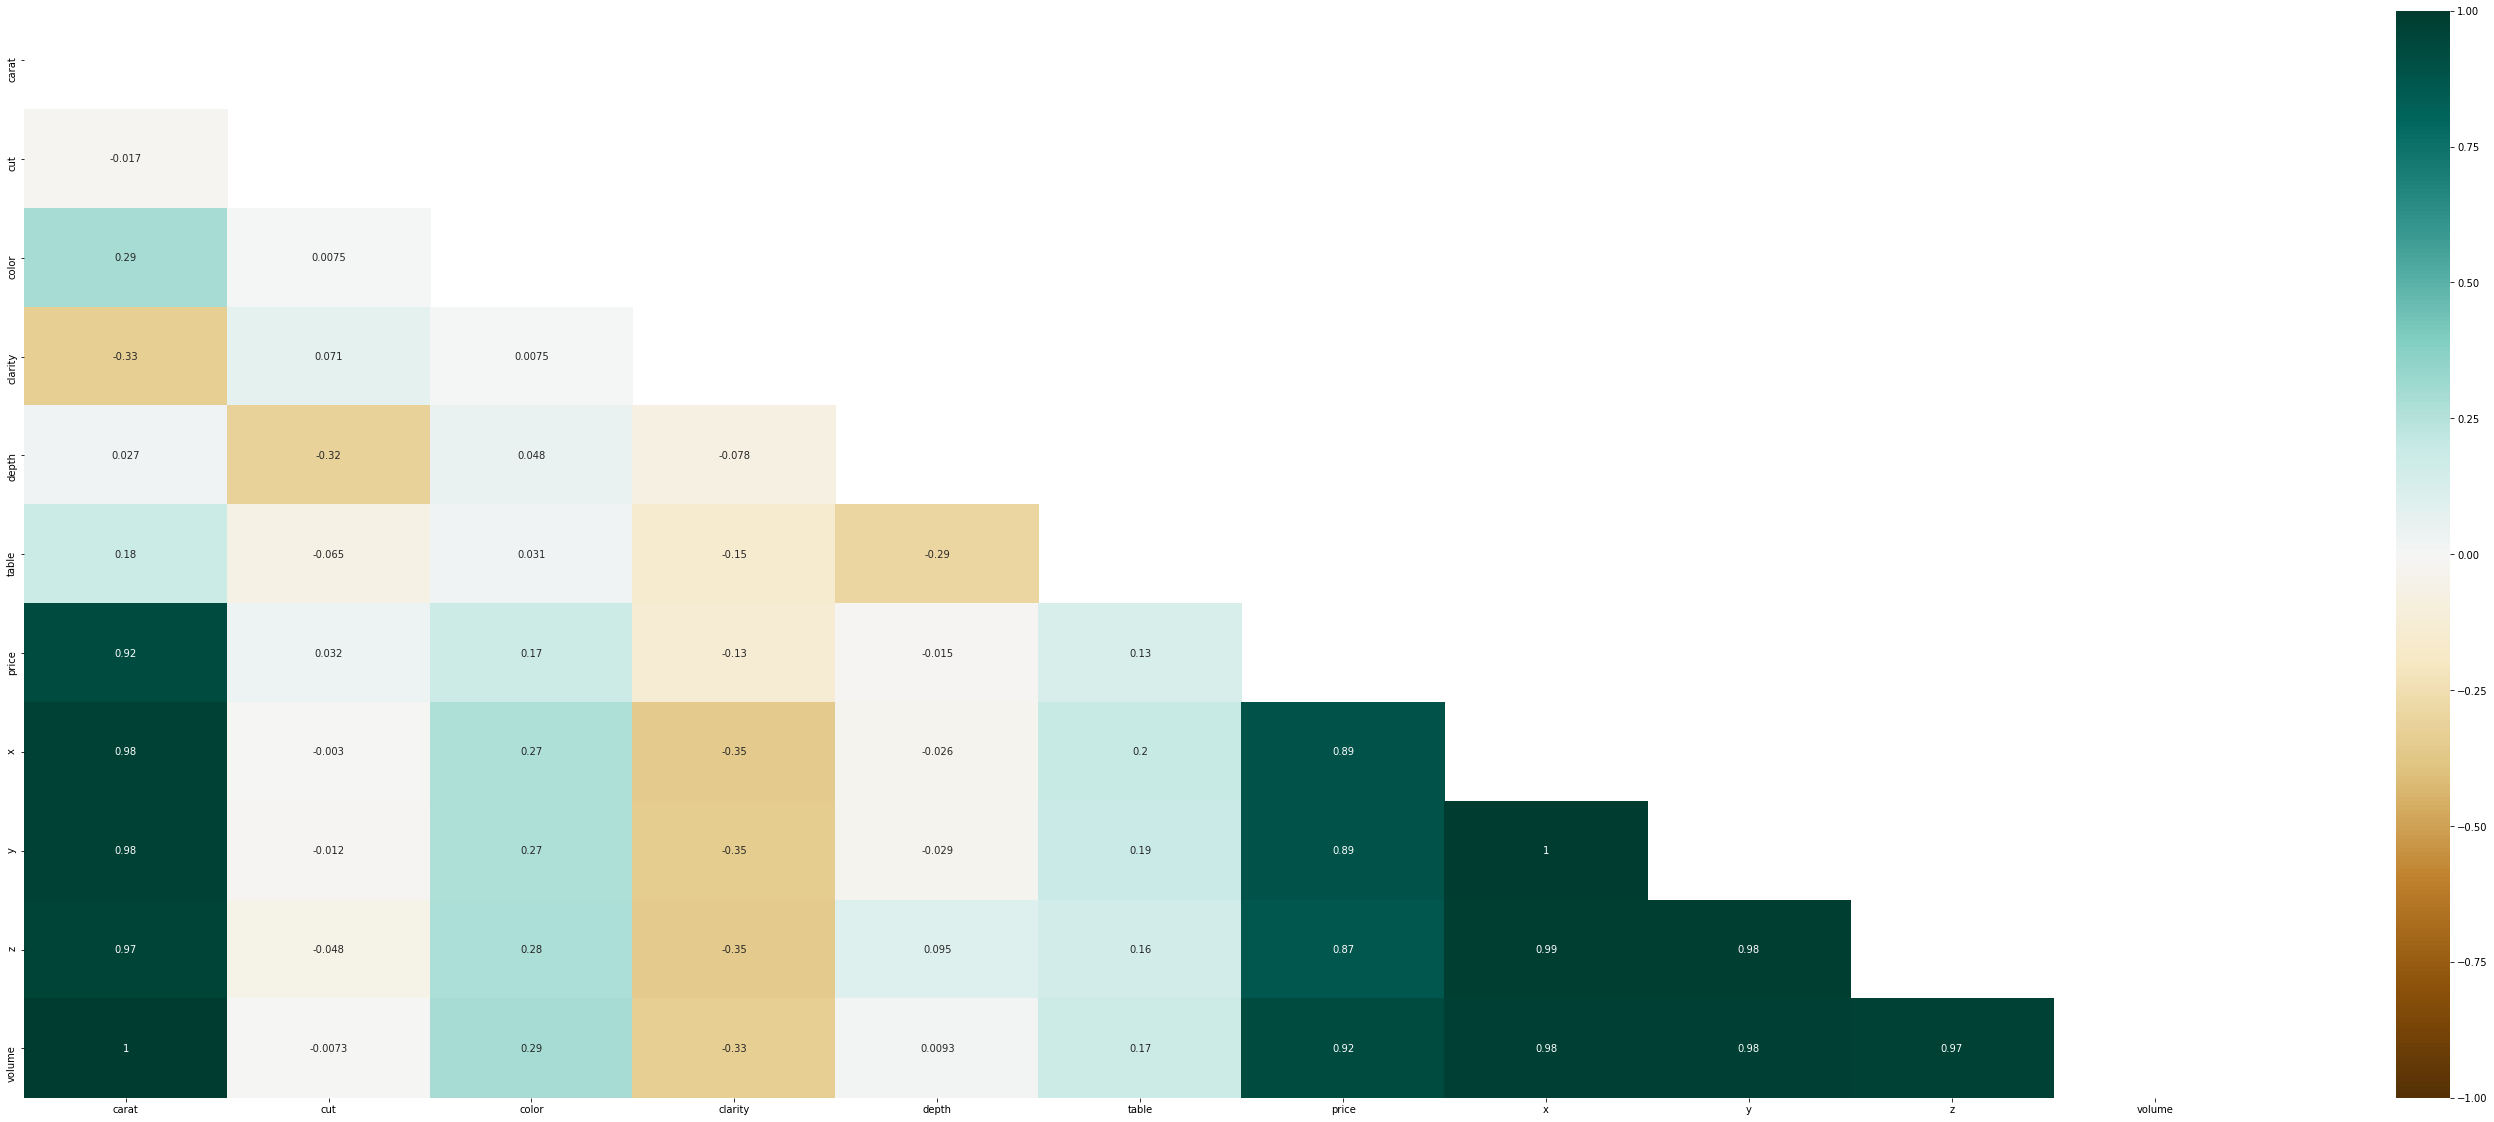

In [15]:
# Let´s find out what are the variables with the biggest correlation with the price

fig, ax = plt.subplots(figsize= (50,20))
mask = np.triu(np.ones_like(df.corr(), dtype= np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin = -1, vmax= +1, annot= True, cmap= 'BrBG')

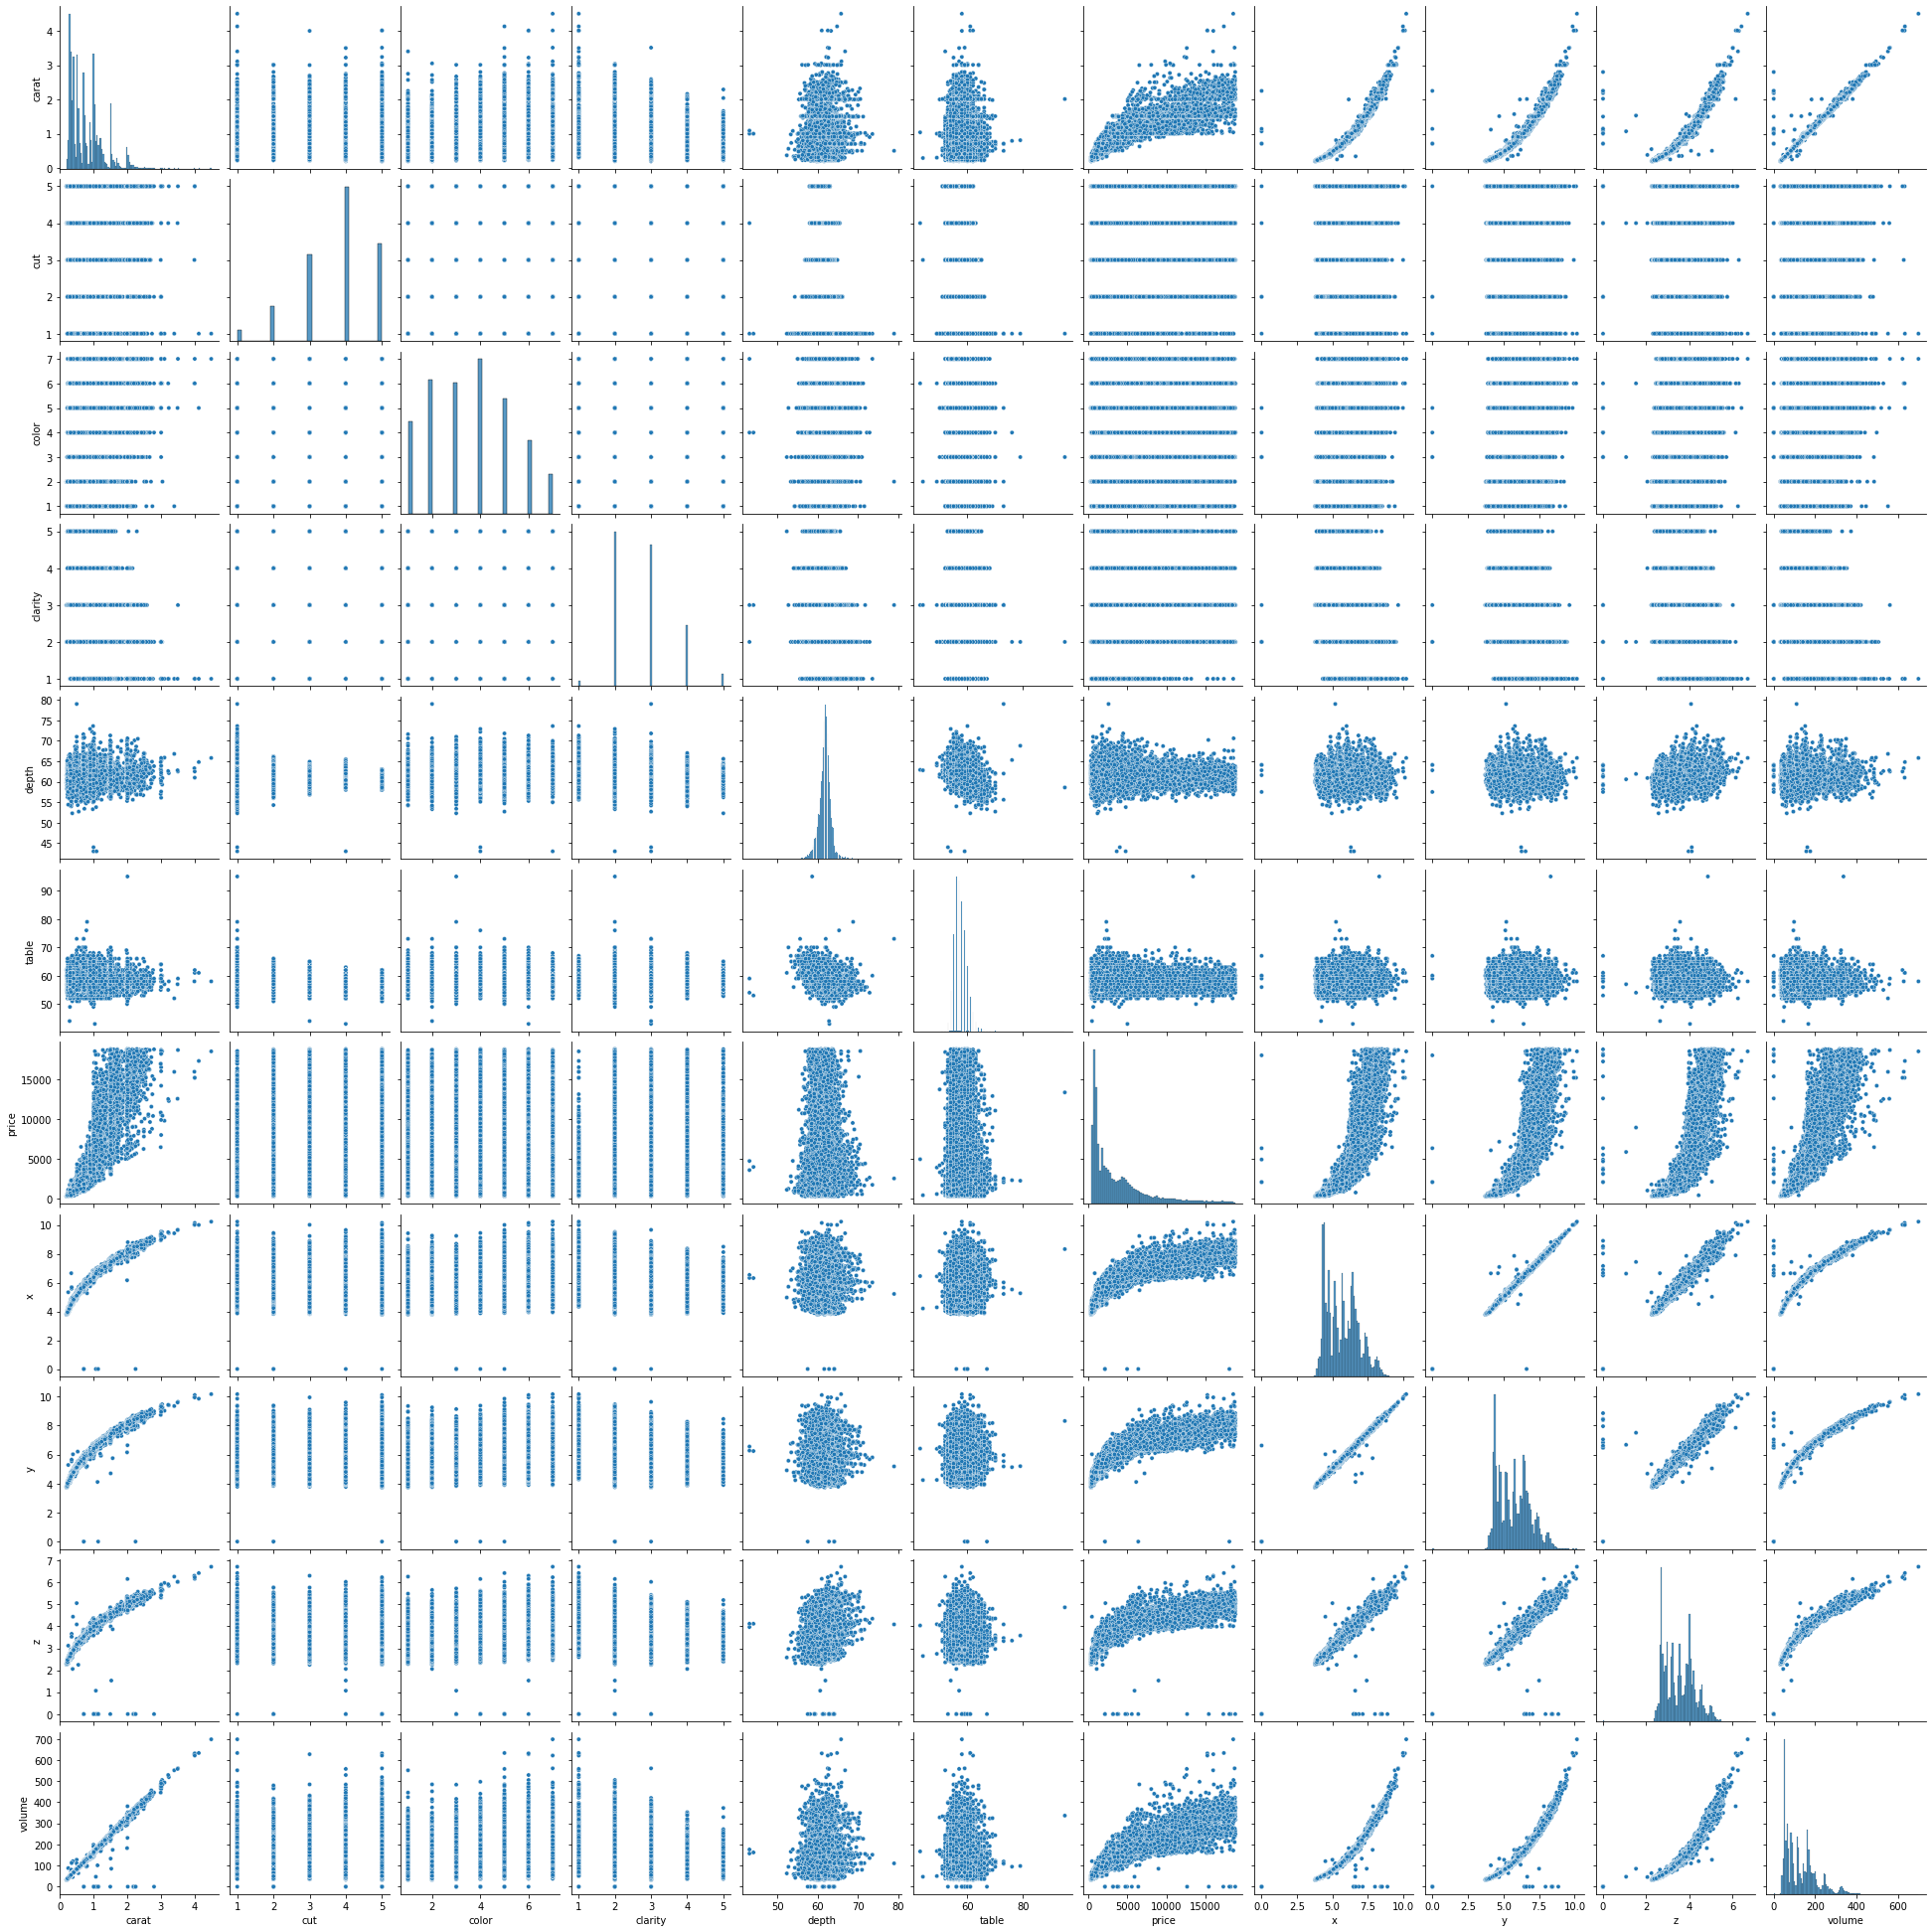

In [16]:
sns.pairplot(data= df, plot_kws={'size':1})

In [17]:
'''
As we can observe, the top variables that are more related to the diamond price in are: carat and the volume wich are extremely correlated between them.
Carat refers to weight, and it sounds perfectly right to see that the higher the weight, the higher the volume
We can also see that there is a negative correlation between the table of the diamond and its cut

'''


'\nAs we can observe, the top variables that are more related to the diamond price in are: carat and the volume wich are extremely correlated between them.\nCarat refers to weight, and it sounds perfectly right to see that the higher the weight, the higher the volume\nWe can also see that there is a negative correlation between the table of the diamond and its cut\n\n'

In [18]:
# Summary Statistics

summary_statistics = df[['price','carat','cut','color','clarity','depth','table','volume']].describe()
summary_statistics

,price,carat,cut,color,clarity,depth,table,volume
count,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000,40454.000000
mean,3928.239754,0.797676,3.757428,3.599199,2.788006,61.752912,57.446144,129.710219
std,3992.253156,0.475513,1.025937,1.701266,0.846571,1.431673,2.233562,76.717503
min,326.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,0.000000
25%,945.000000,0.400000,3.000000,2.000000,2.000000,61.000000,56.000000,64.900000
50%,2397.000000,0.700000,4.000000,4.000000,3.000000,61.800000,57.000000,114.700000
75%,5330.750000,1.040000,5.000000,5.000000,3.000000,62.500000,59.000000,170.800000
max,18823.000000,4.500000,5.000000,7.000000,5.000000,79.000000,95.000000,698.500000


<AxesSubplot:xlabel='carat', ylabel='price'>

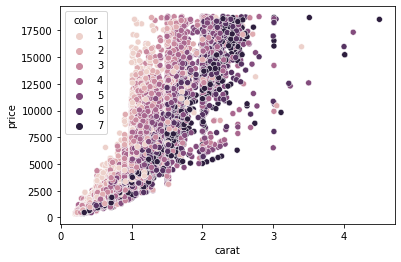

In [19]:
sns.scatterplot(x = df.carat, y = df.price, hue = df.color)

<AxesSubplot:xlabel='color', ylabel='price'>

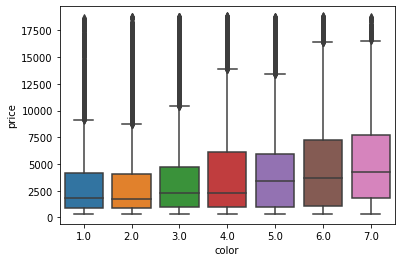

In [20]:
sns.boxplot(x = df.color, y = df.price)

In [21]:
# With these two graphs we observe that the greater the carat, the greater the price.
# The most common diamond is 0.7 carats, and the less valuable ones get sold the most. The media is 2397 when the mean is 3928.
# It also seem that there is a small tendency for pure transparent diamonds to be cheaper which it comes as a surprise to me

<AxesSubplot:xlabel='carat', ylabel='price'>

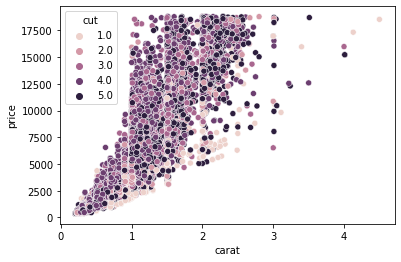

In [22]:
sns.scatterplot(x = df.carat, y = df.price, hue = df.cut)

<AxesSubplot:xlabel='cut', ylabel='price'>

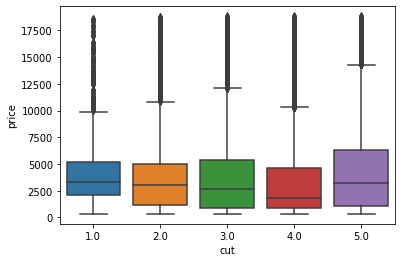

In [23]:
sns.boxplot(x = df.cut, y = df.price)

<AxesSubplot:xlabel='cut', ylabel='volume'>

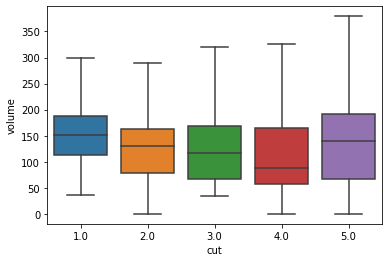

In [24]:
sns.boxplot(x = df.cut, y = df.volume, showfliers=False)

<AxesSubplot:xlabel='cut', ylabel='table'>

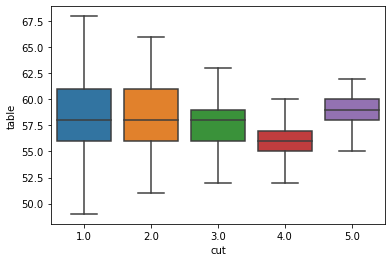

In [25]:
sns.boxplot(x = df.cut, y = df.table, showfliers=False)

<AxesSubplot:xlabel='cut', ylabel='count'>

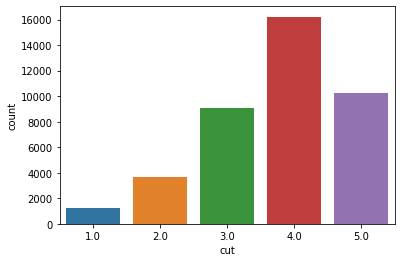

In [26]:
sns.countplot(x=df.cut)

In [27]:
'''
Cut, refers to the way it reflects the light
We can observe that the quality of the cut is almost irrelevant, and the ideal cut is the cheapest of all, which seems very strange. (because of the volume)
Premium: 5
Ideal: 4
Very Good: 3
Good: 2
Fair: 1

And the cut and the table, has a relation in which the worse the cut, the more range of width that it has '''

'\nCut, refers to the way it reflects the light\nWe can observe that the quality of the cut is almost irrelevant, and the ideal cut is the cheapest of all, which seems very strange. (because of the volume)\nPremium: 5\nIdeal: 4\nVery Good: 3\nGood: 2\nFair: 1\n\nAnd the cut and the table, has a relation in which the worse the cut, the more range of width that it has '

In [28]:
# Price/clarity
# How flawless the diamond is. 5 being internally flawless and 1 is the worst

<AxesSubplot:xlabel='clarity', ylabel='price'>

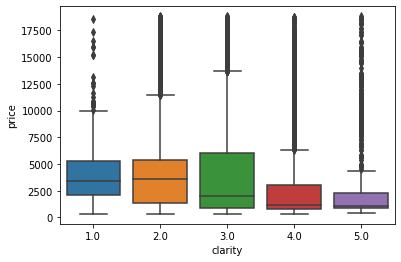

In [29]:
sns.boxplot(x = df.clarity, y = df.price)

<AxesSubplot:xlabel='clarity', ylabel='volume'>

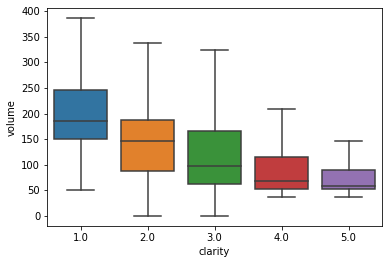

In [30]:
sns.boxplot(x = df.clarity, y = df.volume, showfliers=False)

<AxesSubplot:xlabel='volume', ylabel='price'>

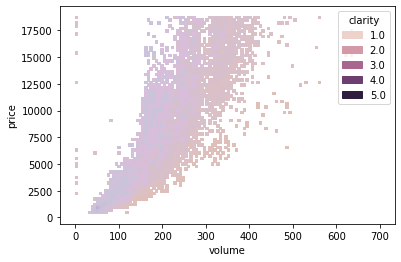

In [31]:
sns.histplot(data = df, x= 'volume', y= 'price', hue= 'clarity')

In [32]:
# The more perfect, the smaller it is, thats why it is cheaper to have an IF diamond, because in general, they are smaller


In [34]:
df.to_csv(r'data/diamonds_modified.csv', index = False)
